> # **Student Depression Analysis And EDA**
---

In [147]:
# %pip install scipy
# %pip install seaborn
# %pip install pandas
# %pip install matplotlib
# %pip install pandasql

In [148]:
# Import necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency # for chi square tests and statistical analysis

---
# **Step 1: Load the Dataset**
---

In [149]:
# Read the CSV file into a pandas DataFrame
# Make sure the CSV file is in the same folder as your notebook, or provide the full path.
df = pd.read_csv('..\Data\student_depression_raw.csv')

# Display the first 5 rows of the DataFrame to get an overview of the data
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


---
#**Step 2: Initial Data Inspection**
---



> 1. Get a concise summary of the DataFrame
This includes the number of non-null values for each column and their data types (Dtype).



In [150]:
print("--- DataFrame Info ---")
df.info()


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                27901 non-null  int64  
 1   Gender                            27901 non-null  object 
 2   Age                               27901 non-null  int64  
 3   City                              27901 non-null  object 
 4   Profession                        27901 non-null  object 
 5   Academic Pressure                 27901 non-null  int64  
 6   Work Pressure                     27901 non-null  int64  
 7   CGPA                              27901 non-null  float64
 8   Study Satisfaction                27901 non-null  int64  
 9   Job Satisfaction                  27901 non-null  int64  
 10  Sleep Duration                    27901 non-null  object 
 11  Dietary Habits                    27901 non-

**2. Check the distribution of a key(Target) categorical column**

This helps us understand the balance of our target variable, 'Depression'.


In [151]:
print("\n--- Depression Target Variable Distribution ---")
print(df['Depression'].value_counts())


--- Depression Target Variable Distribution ---
Depression
1    16336
0    11565
Name: count, dtype: int64


**3. Get a descriptive statistical summary of the numerical columns**

This shows the count, mean, standard deviation, min, max, and quartile values.

In [152]:

print("\n--- Numerical Columns Summary ---")
display(df.describe())



--- Numerical Columns Summary ---


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


**1. Observations from Initial Data Inspection:**

*  **No Missing Values:** The most immediate and important finding is that every single column has 27,901 non-null entries. This is fantastic news, as it means we don't need to perform any complex steps to handle missing data.

*  **Data Types are Mostly Correct:** The numerical columns like `Age` and `CGPA` are correctly identified. Several columns like `Gender`, `suicidal thoughts ?`, and `Financial Stress` are stored as text (`object`), which is fine for now, but we will need to convert them to numbers before we can build a model.



**2. Key Statistical Takeaways 📊**

*   **High Prevalence of Depression:** The mean of the `Depression` column is 0.585. Since 'Yes' is coded as 1 and 'No' as 0, this tells us that 58.5% of the students in this dataset are classified as having depression. This is a very significant initial finding about the sample population.

*   **The "Student" Focus is Confirmed:** The mean for `Work Pressure` and `Job Satisfaction` is almost zero, and the 75th percentile is also zero. This confirms that the vast majority of individuals in this dataset are full-time students without a job, which aligns with our expectations.

*   **Academic and Age Profile:** The average student in this dataset is ~26 years old with a CGPA of 7.65, which seems very reasonable for a population of university students including both undergraduate and postgraduate levels.

**3. The Target Variable is Well-Balanced ✅**

  * The distribution of our target variable, Depression, shows `16,336` students classified as depressed (1) and `11,565` as not depressed (0).

  * This is a roughly `59/41 split`. The classes are not perfectly balanced, but they are not severely imbalanced either. This is great because it means our future predictive model will have a good amount of data to learn from for both outcomes.


---
# **Step 3: Data Cleaning and Preprocessing**
---

**Check how many professions are present.**

*if there are professions other than student then remove them*

In [153]:
df['Profession'].value_counts()

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

In [154]:
# 1. Filter the DataFrame to only include 'Student' professions
# We use .copy() to avoid a common pandas warning (SettingWithCopyWarning)
df_filtered = df[df['Profession']=='Student']
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after filtering for 'Student': {len(df_filtered)}")

Original number of rows: 27901
Number of rows after filtering for 'Student': 27870


In [155]:
df_filtered['Profession'].value_counts()

Profession
Student    27870
Name: count, dtype: int64

> **We can drop Profession column from the filtered dataframe**

In [156]:
# Drop the Profession column from the filtered dataframe
if 'Profession' in df_filtered.columns:
    df_filtered = df_filtered.drop('Profession', axis=1)

# Print the filtered dataframe
print(df_filtered.columns)

Index(['id', 'Gender', 'Age', 'City', 'Academic Pressure', 'Work Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [157]:
df_filtered.head()

,id,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


**Checking for insignificant columns**

In [158]:
columns = ['Gender', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'suicidal thoughts ?',
           'Work Pressure', 'Job Satisfaction', 'Family History of Mental Illness']
for col in columns:
  print(df_filtered[col].value_counts())
  print()

Gender
Male      15529
Female    12341
Name: count, dtype: int64

Academic Pressure
3    7449
5    6286
4    5150
1    4800
2    4176
0       9
Name: count, dtype: int64

Study Satisfaction
4    6350
2    5835
3    5812
1    5446
5    4417
0      10
Name: count, dtype: int64

Sleep Duration
'Less than 5 hours'    8303
'7-8 hours'            7337
'5-6 hours'            6177
'More than 8 hours'    6035
Others                   18
Name: count, dtype: int64

Dietary Habits
Unhealthy    10309
Moderate      9910
Healthy       7639
Others          12
Name: count, dtype: int64

suicidal thoughts ?
Yes    17631
No     10239
Name: count, dtype: int64

Work Pressure
0    27867
5        2
2        1
Name: count, dtype: int64

Job Satisfaction
0    27862
2        3
4        2
1        2
3        1
Name: count, dtype: int64

Family History of Mental Illness
No     14384
Yes    13486
Name: count, dtype: int64



**We found two insgnificant distributions!**

In [159]:
df['Work Pressure'].value_counts()

Work Pressure
0    27898
5        2
2        1
Name: count, dtype: int64

In [160]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
0    27893
2        3
4        2
1        2
3        1
Name: count, dtype: int64

**Low Variance Columns (work_pressure, job_satisfaction):** As we noted, the values in these columns are almost `entirely zero`.
They provide very little information and will `not be useful predictors`. They should be dropped to simplify our dataset.

In [161]:
df_filtered = df_filtered.drop(['id','Work Pressure', 'Job Satisfaction'], axis=1)
print("Dropped columns: 'id', 'work_pressure', 'job_satisfaction'")

Dropped columns: 'id', 'work_pressure', 'job_satisfaction'


# **Convert binary text columns to numerical (0s and 1s)**

In [162]:
# This is crucial for mathematical analysis and many plot types.
# We'll map 'Yes' to 1, 'No' to 0, 'Male' to 1, and 'Female' to 0.
binary_mapping = {'Yes': 1, 'No': 0}
gender_mapping = {'Male': 1, 'Female': 0}

df_filtered['suicidal thoughts ?'] = df_filtered['suicidal thoughts ?'].map(binary_mapping)
df_filtered['Family History of Mental Illness'] = df_filtered['Family History of Mental Illness'].map(binary_mapping)
df_filtered['Gender'] = df_filtered['Gender'].map(gender_mapping)
print("Converted binary text columns to 0s and 1s.")


# Verify the changes by checking the DataFrame's info
# We should see fewer columns and the Dtype for our converted columns should now be int64 or float64.
print("\n--- DataFrame Info After Cleaning ---")
df_filtered.info()

Converted binary text columns to 0s and 1s.

--- DataFrame Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            27870 non-null  int64  
 1   Age                               27870 non-null  int64  
 2   City                              27870 non-null  object 
 3   Academic Pressure                 27870 non-null  int64  
 4   CGPA                              27870 non-null  float64
 5   Study Satisfaction                27870 non-null  int64  
 6   Sleep Duration                    27870 non-null  object 
 7   Dietary Habits                    27870 non-null  object 
 8   Degree                            27870 non-null  object 
 9   suicidal thoughts ?               27870 non-null  int64  
 10  Work/Study Hours                  27870 non-null  in

In [163]:
df_filtered['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10309
Moderate      9910
Healthy       7639
Others          12
Name: count, dtype: int64

In [164]:
df_filtered['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8303
'7-8 hours'            7337
'5-6 hours'            6177
'More than 8 hours'    6035
Others                   18
Name: count, dtype: int64

In [165]:
df_filtered['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "")
# This is done to replace the extra inverted quote (') in each of value of the Sleep Duration Column

In [166]:
# --- Step 2: Ordinal Encoding ---

# 1. Define the correct order for the categories
sleep_order = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}

diet_order = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2
}

# 2. Map the ordered categories to the numerical values
# The .map() function will replace each text value with its corresponding number.
# We will use df_cleaned as the base and create a new df_final_eda for our analysis
df_final_eda = df_filtered.copy()
df_final_eda['Sleep Duration'] = df_final_eda['Sleep Duration'].map(sleep_order)
df_final_eda['Dietary Habits'] = df_final_eda['Dietary Habits'].map(diet_order)
print("Mapped 'Sleep Duration' and 'Dietary Habits' to numerical ranks.")


# 3. Handle the 'Others' category
# The .map() function will turn any category not in our dictionary (like 'Others') into a missing value (NaN).
# Since there are very few of them, we'll fill these missing values with the median of the column.
df_final_eda['Sleep Duration'] = df_final_eda['Sleep Duration'].fillna(df_final_eda['Sleep Duration'].median())
df_final_eda['Dietary Habits'] = df_final_eda['Dietary Habits'].fillna(df_final_eda['Dietary Habits'].median())
print("Handled the 'Others' category by filling with the median value.")


# 4. Verify the changes
# Let's check the data types again and look at the first few rows of our new DataFrame.
print("\n--- DataFrame Info After Ordinal Encoding ---")
df_final_eda.info()

print("\n--- Sample of Encoded Columns ---")
print(df_final_eda[['Sleep Duration', 'Dietary Habits']].head())

Mapped 'Sleep Duration' and 'Dietary Habits' to numerical ranks.
Handled the 'Others' category by filling with the median value.

--- DataFrame Info After Ordinal Encoding ---
<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            27870 non-null  int64  
 1   Age                               27870 non-null  int64  
 2   City                              27870 non-null  object 
 3   Academic Pressure                 27870 non-null  int64  
 4   CGPA                              27870 non-null  float64
 5   Study Satisfaction                27870 non-null  int64  
 6   Sleep Duration                    27870 non-null  float64
 7   Dietary Habits                    27870 non-null  float64
 8   Degree                            27870 non-null  object 
 9   suicidal thoughts ?   

# ***Our dataset is now fully cleaned, preprocessed, and ready for the most important part of the project.***



---


#**Step 4: Exploratory Data Analysis**

---



#**(CGPA vs. Depression)**

**What is the relationship between CGPA and the likelihood of depression?**

* *We will use a box plot to see and compare the distribution of cgpa for students who are depressed versus those who are not.*

In [167]:
print(f"Mean CGPA for Not Depressed Student:",{df_final_eda[df_final_eda['Depression'] == 0]['CGPA'].mean()})
print(f"Mean CGPA for Depressed Student:",{df_final_eda[df_final_eda['Depression'] == 1]['CGPA'].mean()})

Mean CGPA for Not Depressed Student: {np.float64(7.617311883757136)}
Mean CGPA for Depressed Student: {np.float64(7.683476361295069)}


We can clearly say

In [168]:
print(f"Median CGPA for Depressed Student:",{df_final_eda[df_final_eda['Depression'] == 1]['CGPA'].median()})
print(f"Median CGPA for Not Depressed Student:",{df_final_eda[df_final_eda['Depression'] == 0]['CGPA'].median()})

Median CGPA for Depressed Student: {np.float64(7.85)}
Median CGPA for Not Depressed Student: {np.float64(7.64)}


***This completely reverses our initial, simple hypothesis and suggests a much more complex and interesting story. It's not as simple as "poor academic performance is linked to depression." The data suggests that students at the higher end of the CGPA scale are also reporting depression.***

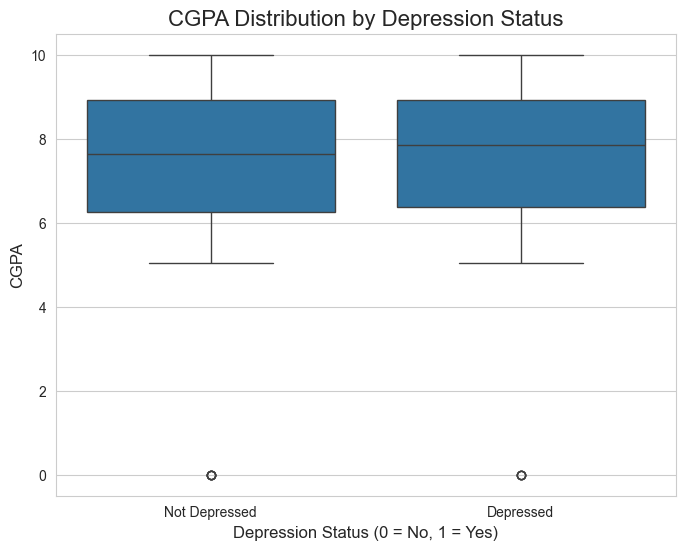

In [169]:
import matplotlib.pyplot as plt
# Set the style for the plots
sns.set_style('whitegrid')

# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Create the box plot using our fully cleaned DataFrame: df_final_eda
sns.boxplot(x='Depression', y='CGPA', data=df_final_eda)

# Set a clear title and labels
plt.title('CGPA Distribution by Depression Status', fontsize=16)
plt.xlabel('Depression Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('CGPA', fontsize=12)
plt.xticks([0, 1], ['Not Depressed', 'Depressed']) # Optional: makes the x-axis labels more readable

# Show the plot
plt.show()

This plot gives us a clear answer to our first question.

## Insight: The data suggests that students at the higher end of the CGPA scale are also reporting depression.

> **CGPA Doesn't play a significant role in causing depression!**

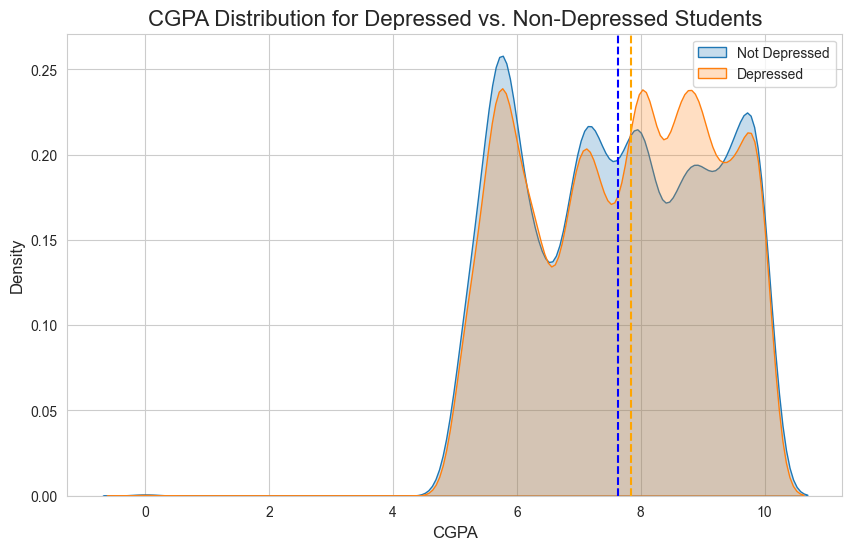

In [170]:
# --- Visualizing the Full CGPA Distribution ---

plt.figure(figsize=(10, 6))

# Plot the distribution for non-depressed students
sns.kdeplot(df_final_eda[df_final_eda['Depression'] == 0]['CGPA'], label='Not Depressed', fill=True)

# Plot the distribution for depressed students
sns.kdeplot(df_final_eda[df_final_eda['Depression'] == 1]['CGPA'], label='Depressed', fill=True)

# Add vertical lines for the MEDIAN of each group
plt.axvline(df_final_eda[df_final_eda['Depression'] == 0]['CGPA'].median(), color='blue', linestyle='--')
plt.axvline(df_final_eda[df_final_eda['Depression'] == 1]['CGPA'].median(), color='orange', linestyle='--')

plt.title('CGPA Distribution for Depressed vs. Non-Depressed Students', fontsize=16)
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

***The relationship between CGPA and depression is not a simple linear one. The data indicates that students at both ends of the academic spectrum are more vulnerable. Those struggling with low grades and those achieving top-tier grades both show a higher prevalence of depression than students in the academic middle.***

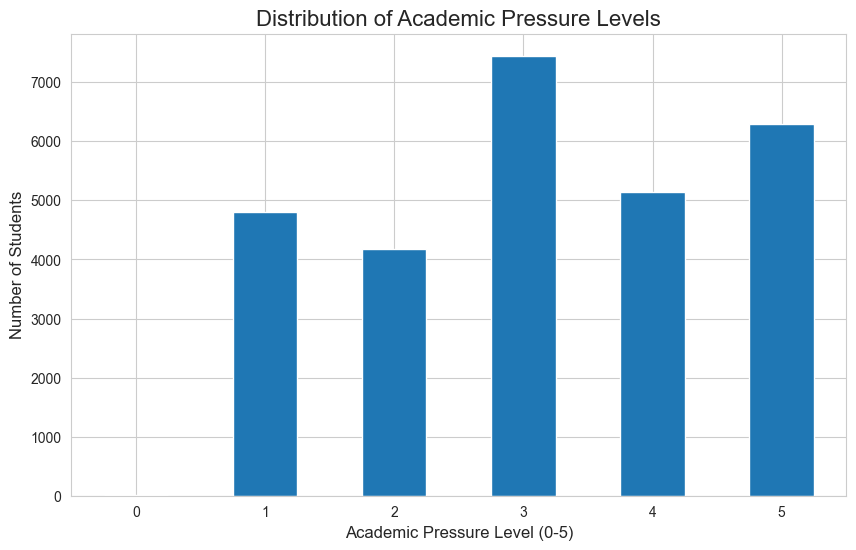

In [171]:
# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
df_final_eda['Academic Pressure'].value_counts().sort_index().plot(kind='bar')

# Set title and labels
plt.title('Distribution of Academic Pressure Levels', fontsize=16)
plt.xlabel('Academic Pressure Level (0-5)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0) # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [172]:
# find average academic pressure for depressed students
print(f"Average Academic Pressure for Depressed Students: {df_final_eda[df_final_eda['Depression'] == 1]['Academic Pressure'].mean():.4f}")
# find average academic pressure for non - depressed students
print(f"Average Academic Pressure for non Depressed Students: {df_final_eda[df_final_eda['Depression'] == 0]['Academic Pressure'].mean():.4f}")

Average Academic Pressure for Depressed Students: 3.6930
Average Academic Pressure for non Depressed Students: 2.3615


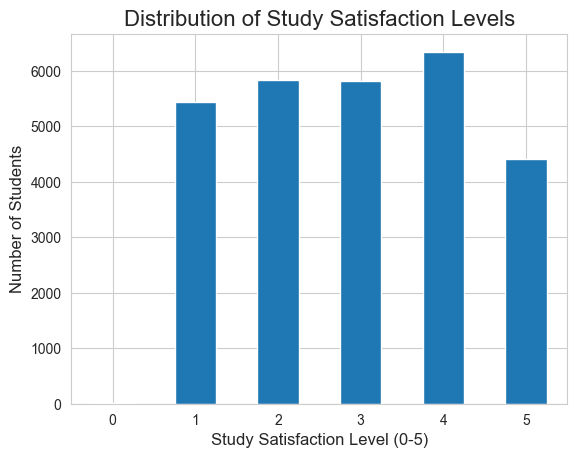

In [173]:
df_final_eda['Study Satisfaction'].value_counts().sort_index().plot(kind='bar')

# Set title and labels
plt.title('Distribution of Study Satisfaction Levels', fontsize=16)
plt.xlabel('Study Satisfaction Level (0-5)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0) # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [174]:
# Find average study satisfaction for depressed and not depressed students
print(f"Average Study Satisfaction for Depressed Students: {df_final_eda[df_final_eda['Depression'] == 1]['Study Satisfaction'].mean():.4f}")
print(f"Average Study Satisfaction for non Depressed Students: {df_final_eda[df_final_eda['Depression'] == 0]['Study Satisfaction'].mean():.4f}")

Average Study Satisfaction for Depressed Students: 2.7509
Average Study Satisfaction for non Depressed Students: 3.2154


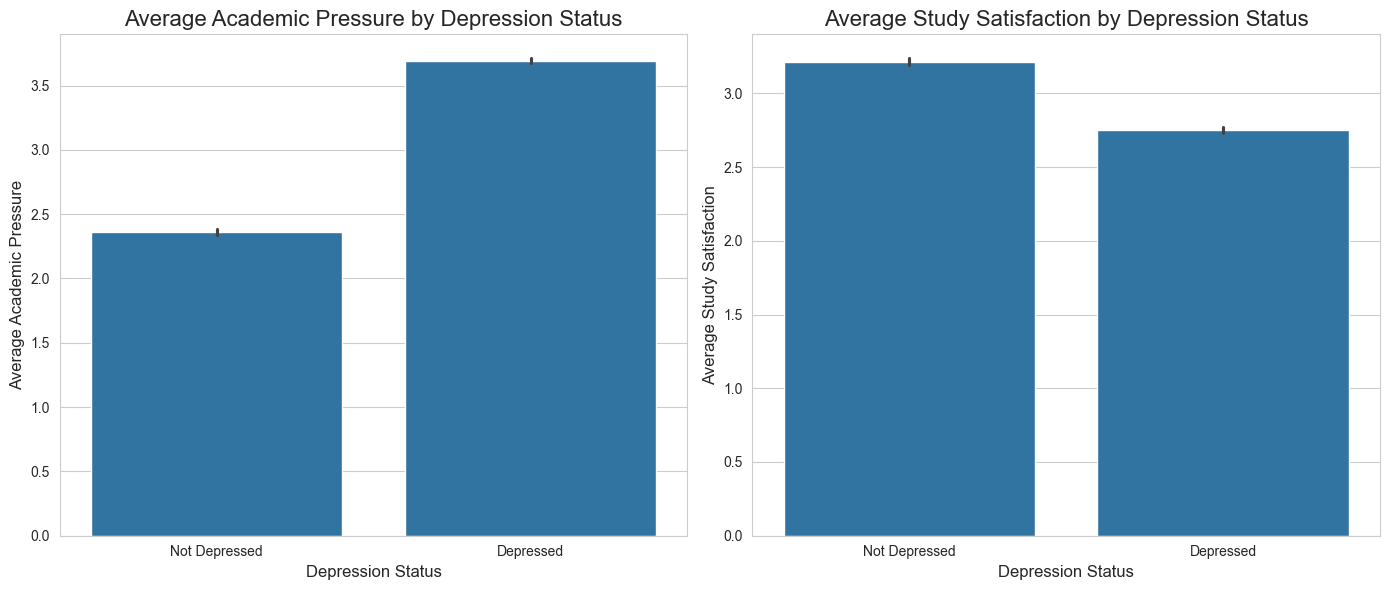

In [175]:
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Academic Pressure ---
sns.barplot(x='Depression', y='Academic Pressure', data=df_final_eda, ax=axes[0])
axes[0].set_title('Average Academic Pressure by Depression Status', fontsize=16)
axes[0].set_xlabel('Depression Status', fontsize=12)
axes[0].set_ylabel('Average Academic Pressure', fontsize=12)
# Set explicit ticks before labels to fix warning
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Depressed', 'Depressed'])

# --- Plot 2: Study Satisfaction ---
sns.barplot(x='Depression', y='Study Satisfaction', data=df_final_eda, ax=axes[1])
axes[1].set_title('Average Study Satisfaction by Depression Status', fontsize=16)
axes[1].set_xlabel('Depression Status', fontsize=12)
axes[1].set_ylabel('Average Study Satisfaction', fontsize=12)
# Set explicit ticks before labels to fix warning
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Depressed', 'Depressed'])

# Display the plots
plt.tight_layout() # Adjusts plots to prevent labels from overlapping
plt.show()


---


## **Insight: Poor Academic Experience is Strongly Linked to Depression**


---


These results confirm a very strong relationship between a student's subjective academic experience and their mental health.

*   **Higher Academic Pressure:** Students who report depression experience significantly `higher levels of academic pressure`, with an average score of `3.69 out of 5`, compared to just `2.36` for non-depressed students. 😥

*   **Lower Study Satisfaction:** At the same time, depressed students show a notably `lower satisfaction with their studies`, averaging `2.75 out of 5`, while their non-depressed peers are higher at `3.21`. 📚

---
# **Work/Study Hours vs. Depression**
---

Distribution of Study Hours Categories:


Study_Hours_Category
High         10764
Very High     6057
Less          5900
Moderate      5149
Name: count, dtype: int64


Depression Rate by Study Hours Category:


,Study_Hours_Category,Depression
3,Very High,0.680700
0,High,0.643906
2,Moderate,0.544378
1,Less,0.415424


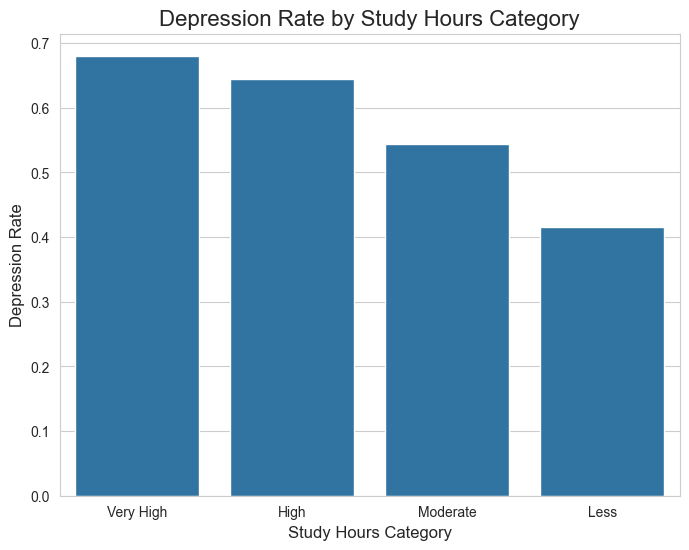

In [176]:
# 1. Define categories for Work/Study Hours
# Based on the value counts, let's define some ranges:
# Less: 0-4 hours
# Moderate: 5-8 hours
# High: 9-11 hours
# Very High: 12+ hours

def categorize_study_hours(hours):
    if hours <= 3:
        return 'Less'
    elif 4 <= hours <= 6:
        return 'Moderate'
    elif 7 <= hours <= 10:
        return 'High'
    else: # hours >= 11
        return 'Very High'

# Add the new categorical column
df_final_eda['Study_Hours_Category'] = df_final_eda['Work/Study Hours'].apply(categorize_study_hours)

# 2. Check the distribution of the new category
print("Distribution of Study Hours Categories:")
display(df_final_eda['Study_Hours_Category'].value_counts())

# 3. Analyze the relationship with Depression
print("\nDepression Rate by Study Hours Category:")
study_hours_depression = df_final_eda.groupby('Study_Hours_Category')['Depression'].mean().reset_index()

# Sort for better visualization
study_hours_depression = study_hours_depression.sort_values(by='Depression', ascending=False)

display(study_hours_depression)

# 4. Visualize the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x='Study_Hours_Category', y='Depression', data=study_hours_depression, order=study_hours_depression['Study_Hours_Category']) # Use sorted order

plt.title('Depression Rate by Study Hours Category', fontsize=16)
plt.xlabel('Study Hours Category', fontsize=12)
plt.ylabel('Depression Rate', fontsize=12)

plt.show()

---

## **Insights: Work/Study Hours vs. Depression**

Based on the table and bar plot showing the depression rate by Study Hours Category, here are some proper insights:

*   **Higher Hours, Higher Depression:** There is a clear trend showing that students who report spending **more hours on work/study** tend to have **higher depression rates**.
*   **Lowest Depression:** Students in the **'Less' (0-3 hours)** study hours category have the lowest depression rate (around 41.5%).
*   **Moderate Increase:** The depression rate increases for students in the **'Moderate' (4-6 hours)** category (around 54.4%).
*   **Significantly Higher with More Hours:** The depression rates are highest for students in the **'High' (7-10 hours)** (around 64.3%) and **'Very High' (11+ hours)** (around 68.0%) categories.
*   **Consistency Across High Categories:** The depression rates for the 'High' and 'Very High' categories are quite similar and are substantially higher than the 'Less' and 'Moderate' categories.

This analysis suggests that putting in very long hours for studying or working can be associated with a significantly increased risk of depression among students in this dataset.



---


# **Lifestyle vs. Depression**


---



**Which lifestyle factors (Sleep Duration, Dietary Habits) show the strongest correlation with depression?**

In [177]:
# Count the number of students with different dietary habits
unhealthy_diet = df_final_eda[df_final_eda['Dietary Habits'] == 0].shape[0]
print(f"Students with unhealthy dietary habits: {unhealthy_diet}")

moderate_diet = df_final_eda[df_final_eda['Dietary Habits'] == 1].shape[0]
print(f"Students with moderate dietary habits: {moderate_diet}")

healthy_diet = df_final_eda[df_final_eda['Dietary Habits'] == 2].shape[0]
print(f"Students with healthy dietary habits: {healthy_diet}")

Students with unhealthy dietary habits: 10309
Students with moderate dietary habits: 9922
Students with healthy dietary habits: 7639


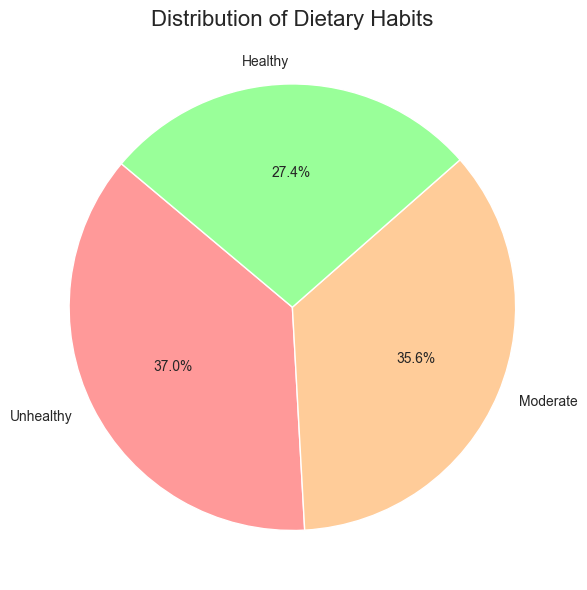

In [178]:
# Plotting Dietary Habits Distribution as a Pie Chart
dietary_counts = df_final_eda['Dietary Habits'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(dietary_counts, labels=['Unhealthy', 'Moderate', 'Healthy'],
        autopct='%1.1f%%', startangle=140, colors=['#ff9999','#ffcc99','#99ff99'])

plt.title('Distribution of Dietary Habits', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent text overlapping

plt.show()

In [179]:
# Count the number of students with different sleep durations
sleep_duration_counts = df_final_eda['Sleep Duration'].value_counts().sort_index()

# Print the counts
print("Sleep Duration Distribution:")
print(sleep_duration_counts)

Sleep Duration Distribution:
Sleep Duration
0.0    8303
1.0    6195
2.0    7337
3.0    6035
Name: count, dtype: int64


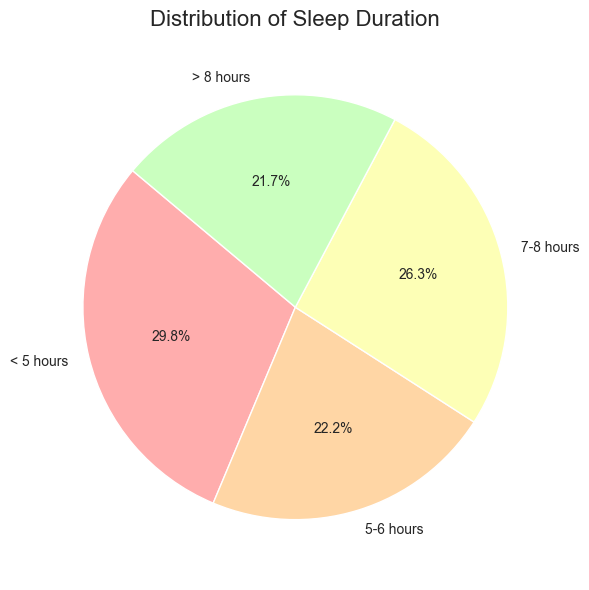

In [180]:
# Plotting Sleep Duration Distribution as a Pie Chart
sleep_duration_counts = df_final_eda['Sleep Duration'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
# We'll use the numeric values for plotting but add labels for clarity
sleep_labels = ['< 5 hours', '5-6 hours', '7-8 hours', '> 8 hours']
plt.pie(sleep_duration_counts, labels=sleep_labels, autopct='%1.1f%%', startangle=140, colors=['#ffadad','#ffd6a5','#fdffb6','#caffbf'])
plt.title('Distribution of Sleep Duration', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent text overlapping

plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1672\3965938265.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(sleep_labels)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1672\3965938265.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(diet_labels)


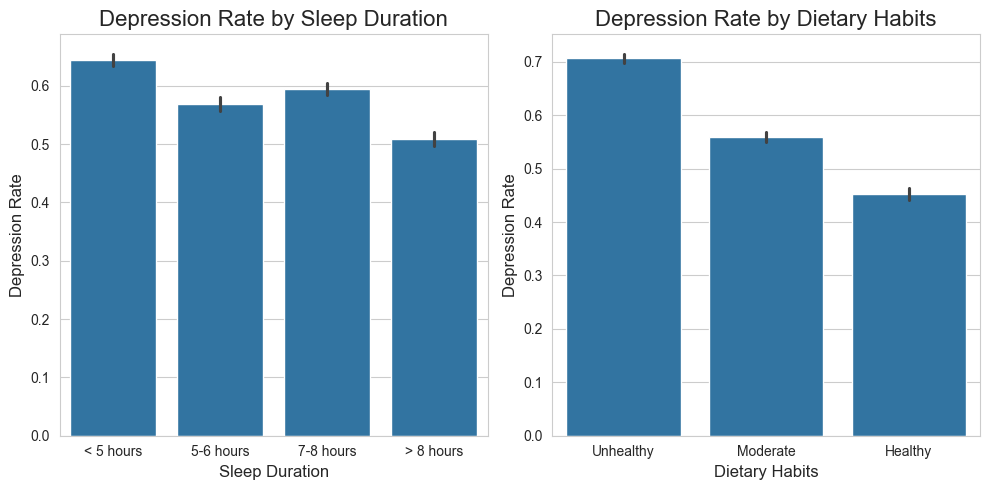

In [181]:
# ---Lifestyle vs. Depression ---

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Plot 1: Sleep Duration ---
# Seaborn's barplot automatically calculates the mean of the y-variable for each category on the x-variable.
# Since 'depression' is 0 or 1, the mean is the same as the rate/percentage.
sns.barplot(x='Sleep Duration', y='Depression', data=df_final_eda, ax=axes[0])
axes[0].set_title('Depression Rate by Sleep Duration', fontsize=16)
axes[0].set_xlabel('Sleep Duration', fontsize=12)
axes[0].set_ylabel('Depression Rate', fontsize=12)
# We'll set the x-tick labels back to the original text for readability
sleep_labels = ['< 5 hours', '5-6 hours', '7-8 hours', '> 8 hours']
axes[0].set_xticklabels(sleep_labels)


# --- Plot 2: Dietary Habits ---
sns.barplot(x='Dietary Habits', y='Depression', data=df_final_eda, ax=axes[1])
axes[1].set_title('Depression Rate by Dietary Habits', fontsize=16)
axes[1].set_xlabel('Dietary Habits', fontsize=12)
axes[1].set_ylabel('Depression Rate', fontsize=12)
# Set the x-tick labels back to the original text
diet_labels = ['Unhealthy', 'Moderate', 'Healthy']
axes[1].set_xticklabels(diet_labels)


# Display the plots
plt.tight_layout()
plt.show()

###**Insights: Healthier Dietary Habits  and More Sleep are Strongly Associated with Lower Depression Rates**

* The analysis reveals a clear and significant trend linking dietary habits to student depression. As a student's diet improves, their likelihood of reporting depression decreases substantially.

* **Unhealthy Diets:** Students with unhealthy eating habits show the highest rate of depression. **70.7%** of students in this group report being depressed (**7,289 out of 10,309**). 🍔
* **Moderate Diets:** For students with moderate dietary habits, the depression rate drops to **56.0%** (**5,556 out of 9,922**). 🍟
* **Healthy Diets:** Students with healthy diets have the lowest rate of depression by a significant margin. Only **45.3%** of students in this group report depression (**3,463 out of 7,639**). 🥗

* `The depression rate improves for those getting less than 5 hours of sleep, dropping to around 64%.`



---


# **Gender VS Depression**

---



***Is any Gender more likely to report Depression?***

In [182]:
df_final_eda['Gender'].value_counts()

Gender
1    15529
0    12341
Name: count, dtype: int64

In [183]:
# Finding Depressed Boys and Depressed Girls
depressed_boys = df_final_eda[(df_final_eda['Depression'] == 1) & (df_final_eda['Gender'] == 1)].shape[0]
depressed_girls = df_final_eda[(df_final_eda['Depression'] == 1) & (df_final_eda['Gender'] == 0)].shape[0]

print(f"Depressed Boys: {depressed_boys}")
print(f"Depressed Girls: {depressed_girls}")

Depressed Boys: 9100
Depressed Girls: 7208


Percentage of Depressed Students by Gender:
Gender
1    58.600039
0    58.406936
Name: count, dtype: float64


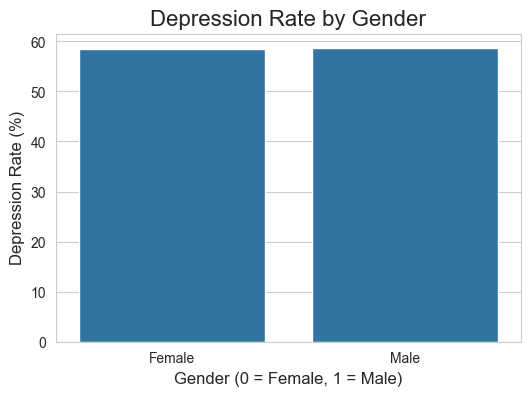

In [184]:
# Calculate the total number of students for each gender
gender_counts = df_final_eda['Gender'].value_counts()

# Calculate the number of depressed students for each gender
depressed_gender_counts = df_final_eda[df_final_eda['Depression'] == 1]['Gender'].value_counts()

# Calculate the percentage of depressed students within each gender
percentage_depressed_by_gender = (depressed_gender_counts / gender_counts) * 100

print("Percentage of Depressed Students by Gender:")
print(percentage_depressed_by_gender)

# Create a bar plot to visualize the depression rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=percentage_depressed_by_gender.index, y=percentage_depressed_by_gender.values)

# Set title and labels
plt.title('Depression Rate by Gender', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Depression Rate (%)', fontsize=12)
plt.xticks([0, 1], ['Female', 'Male']) # Optional: makes the x-axis labels more readable

# Show the plot
plt.show()

###**Insights: Gender Does not appear to be a significant factor in determining whether a student is depressed.**

* The percentage of depressed students is very similar for both genders.

* Approximately 58.6% of male students report being depressed, while approximately 58.4% of female students report being depressed.

* This suggests that in this dataset, **gender does not appear to be a significant factor in determining whether a student is depressed.** The depression rate is nearly the same for both male and female students.



---


# **Age VS Depression**

---



--- Age Distribution by Depression Status ---
              count       mean       std   min   25%   50%   75%   max
Depression                                                            
0           11562.0  27.142363  4.943988  18.0  23.0  28.0  31.0  59.0
1           16308.0  24.884413  4.658268  18.0  21.0  24.0  28.0  48.0


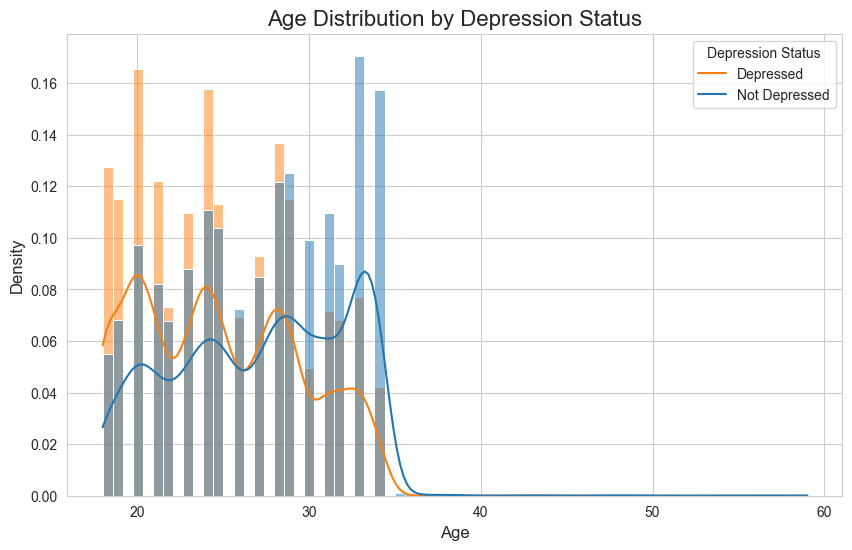

In [185]:
# Get descriptive statistics for Age, grouped by Depression status
print("--- Age Distribution by Depression Status ---")
print(df_final_eda.groupby('Depression')['Age'].describe())

# Visualize the age distribution for depressed and non-depressed students
plt.figure(figsize=(10, 6))

sns.histplot(data=df_final_eda, x='Age', hue='Depression', kde=True, stat='density', common_norm=False)

plt.title('Age Distribution by Depression Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Depression Status', labels=['Depressed', 'Not Depressed'])

plt.show()



---


# **Family History VS Depression**


---


* ***How much more likely are students with a family history of mental illness to experience depression compared to those without?***

In [186]:
df_final_eda['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    14384
1    13486
Name: count, dtype: int64

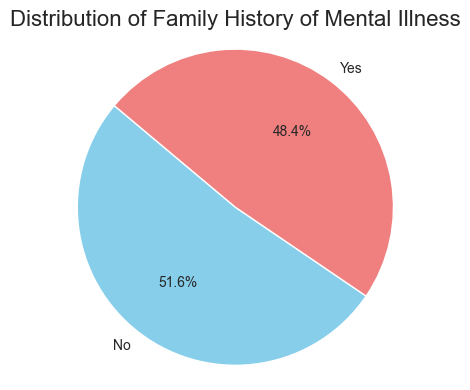

In [187]:
# Count the occurrences of each category in the 'Family History of Mental Illness' column
family_history_counts = df_final_eda['Family History of Mental Illness'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(family_history_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Family History of Mental Illness', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent text overlapping

plt.show()

In [188]:
# Create a crosstab to count occurrences of Depression for each Family History category
family_history_depression_counts = pd.crosstab(df_final_eda['Family History of Mental Illness'], df_final_eda['Depression'])
# display(family_history_depression_counts)

# Rename columns for clarity
family_history_depression_counts.columns = ['Non-Depressed', 'Depressed']
family_history_depression_counts.index = ['No Family History', 'Family History']

# Calculate percentages
family_history_depression_counts['Total'] = family_history_depression_counts['Non-Depressed'] + family_history_depression_counts['Depressed']
family_history_depression_counts['Depressed %'] = (family_history_depression_counts['Depressed'] / family_history_depression_counts['Total']) * 100
family_history_depression_counts['Non-Depressed %'] = (family_history_depression_counts['Non-Depressed'] / family_history_depression_counts['Total']) * 100

# Add a new column for total depressed students overall


print("Family History of Mental Illness vs. Depression:")

display(family_history_depression_counts)

Family History of Mental Illness vs. Depression:


,Non-Depressed,Depressed,Total,Depressed %,Non-Depressed %
No Family History,6334,8050,14384,55.964961,44.035039
Family History,5228,8258,13486,61.233872,38.766128


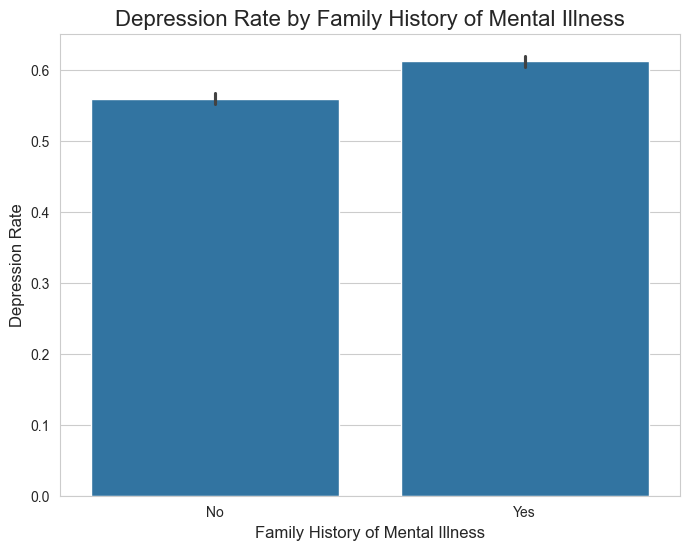

In [189]:
# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Create the bar plot
# The y-axis will automatically calculate the mean of 'depression', which is the depression rate.
sns.barplot(x='Family History of Mental Illness', y='Depression', data=df_final_eda)

# Set a clear title and labels
plt.title('Depression Rate by Family History of Mental Illness', fontsize=16)
plt.xlabel('Family History of Mental Illness', fontsize=12)
plt.ylabel('Depression Rate', fontsize=12)

# Set the x-tick labels back to 'No' and 'Yes' for clarity
plt.xticks([0, 1], ['No', 'Yes'])

# Show the plot
plt.show()

## Insight: Higher Depression Rate with Family History:

* Students with a family history of mental illness have a depression rate of **61.2%.** 🧬

* Students without a family history have a depression rate of **56.0%**.

* A large number of students in this dataset **(13,486)** have a family history of mental illness, and among them, a substantial portion **(8,258)** are depressed.

* There are **(14,384)** students with no mental family illness history and among them **(8,050)** are depressed





---


#**Financial Stress vs. Depression**

---




Distribution of Financial Stress Levels:


Financial Stress
1.0    5116
2.0    5058
3.0    5219
4.0    5770
5.0    6704
Name: count, dtype: int64

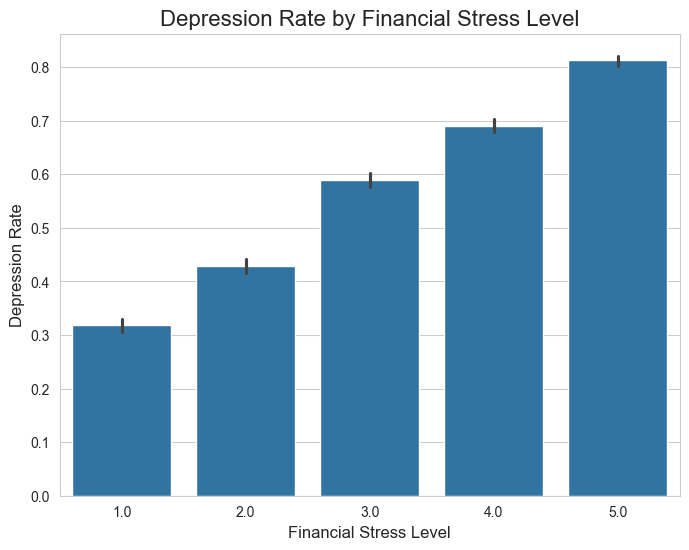

In [190]:
# Ensure 'Financial Stress' is numeric, handling potential errors
df_final_eda['Financial Stress'] = pd.to_numeric(df_final_eda['Financial Stress'], errors='coerce')

# Drop rows where 'Financial Stress' is NaN after coercion
df_financial_stress = df_final_eda.dropna(subset=['Financial Stress']).copy()


# 1. Distribution of Financial Stress Levels
print("Distribution of Financial Stress Levels:")
display(df_financial_stress['Financial Stress'].value_counts().sort_index())

# 2. Visualize the relationship with Depression using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Financial Stress', y='Depression', data=df_financial_stress)

plt.title('Depression Rate by Financial Stress Level', fontsize=16)
plt.xlabel('Financial Stress Level', fontsize=12)
plt.ylabel('Depression Rate', fontsize=12)

plt.show()

###**Financial stress levels significantly impact student depression.**

*  As financial worries rise, so does the depression rate.
  Students with high stress are far more vulnerable.
  Targeted financial support is crucial for mental health.
  Money matters deeply in student well-being.



---


# **Interaction of Stressors**


---



**Does 'Financial Stress' amplify the negative effect of high 'Academic Pressure' on depression?**

* This is an advanced question that looks at the interaction between two major stressors. It investigates whether academic pressure becomes significantly more toxic when a student is also worried about money, informing policies around financial aid and student support.

In [191]:
df_final_eda['Financial Stress'].value_counts()

Financial Stress
5.0    6704
4.0    5770
3.0    5219
1.0    5116
2.0    5058
Name: count, dtype: int64

In [192]:
df_final_eda['Financial Stress'].corr(df_final_eda['Academic Pressure'])

np.float64(0.15179462413791242)

In [193]:
display(df_final_eda['Academic Pressure'].value_counts())
#  we should remove the 0 value
df_final_eda = df_final_eda[df_final_eda['Academic Pressure'] != 0]
df_final_eda['Academic Pressure'].value_counts()

Academic Pressure
3    7449
5    6286
4    5150
1    4800
2    4176
0       9
Name: count, dtype: int64

Academic Pressure
3    7449
5    6286
4    5150
1    4800
2    4176
Name: count, dtype: int64

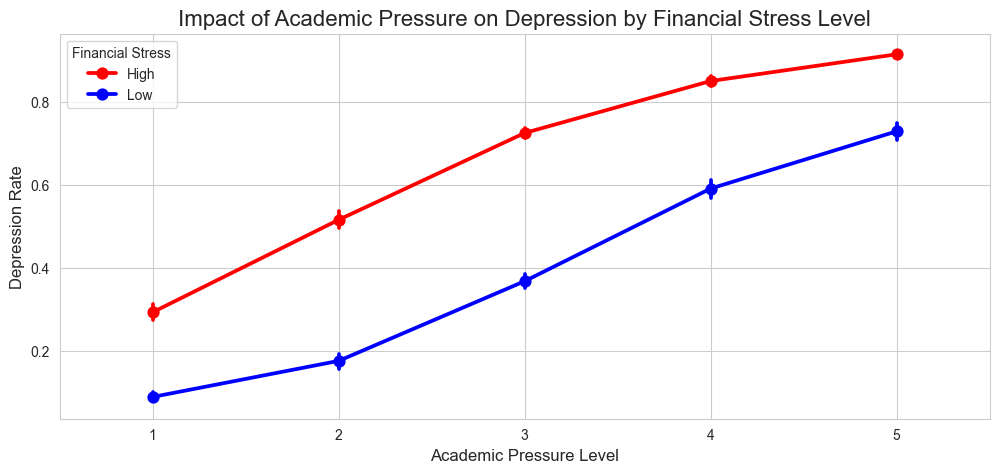

In [194]:
# Convert 'Financial Stress' to numeric, coercing errors (will turn '?' into NaN)
df_final_eda['Financial Stress'] = pd.to_numeric(df_final_eda['Financial Stress'], errors='coerce')

# To make the comparison clear, let's group 'financial_stress' into two categories.
# We'll define scores of 3 or more as 'High' and less than 3 as 'Low'.
df_final_eda['financial_stress_group'] = df_final_eda['Financial Stress'].apply(lambda x: 'High' if x >= 3 else 'Low')

# Create a figure for the plot
plt.figure(figsize=(12, 5))

# Create the point plot
# x: 'academic_pressure' - The primary stressor we're examining.
# y: 'depression' - The outcome (rate of depression).
# hue: 'financial_stress_group' - This splits the data into two lines.
sns.pointplot(x='Academic Pressure', y='Depression', hue='financial_stress_group', data=df_final_eda, palette={'Low': 'blue', 'High': 'red'})

# Set a clear title and labels
plt.title('Impact of Academic Pressure on Depression by Financial Stress Level', fontsize=16)
plt.xlabel('Academic Pressure Level', fontsize=12)
plt.ylabel('Depression Rate', fontsize=12)
plt.grid(True)
plt.legend(title='Financial Stress')

# Show the plot
plt.show()

## **Insight: Financial Stress Significantly Amplifies the Impact of Academic Pressure**
The plot clearly shows that financial stress doesn't just add to a student's problems; it multiplies the effect of their academic stress.

*   **Financial Stress is an Independent Factor:** **`At every single level of academic pressure, the red line ('High Financial Stress') is significantly above the blue line ('Low Financial Stress').`** This means that students with high financial stress have a much higher baseline rate of depression, regardless of how much academic pressure they feel. 😥

*   **Financial Stress is an Amplifier:** The most important insight comes from the widening gap between the two lines. The red line has a much steeper upward slope than the blue line. This visually demonstrates that as academic pressure increases, the negative impact on students with high financial stress is far more severe than on those with low financial stress. 🔥

This finding is crucial for understanding the complex factors contributing to student depression and can inform targeted support strategies.



---


# **Degree Persuing vs. Depression**

---



  * **Which 'Degree' or field of study is associated with the highest rates of depression?**

In [195]:
# Group by 'Degree' and calculate counts and mean depression
degree_analysis = df_final_eda.groupby('Degree')['Depression'].agg(['count', 'sum', 'mean']).reset_index()

# Rename columns for clarity
degree_analysis.columns = ['Degree', 'Total Students', 'Depressed Students', 'Depressed Percentage']

# Get the top 15 degrees by total students
top_15_degrees_by_total = degree_analysis.nlargest(15, 'Total Students')

# Filter the degree_analysis table to include only these top 15 degrees
degree_analysis_top_15 = degree_analysis[degree_analysis['Degree'].isin(top_15_degrees_by_total['Degree'])].copy()

# Convert Depressed Percentage to actual percentage (multiply by 100)
degree_analysis_top_15['Depressed Percentage'] = degree_analysis_top_15['Depressed Percentage'] * 100

# Sort the table by Total Students in descending order
degree_analysis_top_15 = degree_analysis_top_15.sort_values(by='Depressed Percentage', ascending=False)


print("Depression Analysis for Top 15 Degrees by Total Students:")
display(degree_analysis_top_15)

Depression Analysis for Top 15 Degrees by Total Students:


,Degree,Total Students,Depressed Students,Depressed Percentage
0,'Class 12',6072,4299,70.800395
1,B.Arch,1477,870,58.903182
11,BSc,885,521,58.870056
7,BBA,695,406,58.417266
8,BCA,1432,818,57.122905
25,MSc,1186,675,56.913997
5,B.Tech,1152,655,56.857639
2,B.Com,1505,853,56.677741
10,BHM,922,506,54.880694
3,B.Ed,1864,1018,54.613734


C:\Users\lenovo\AppData\Local\Temp\ipykernel_1672\739424147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degree_depression_rates.values, y=degree_depression_rates.index, palette='viridis')


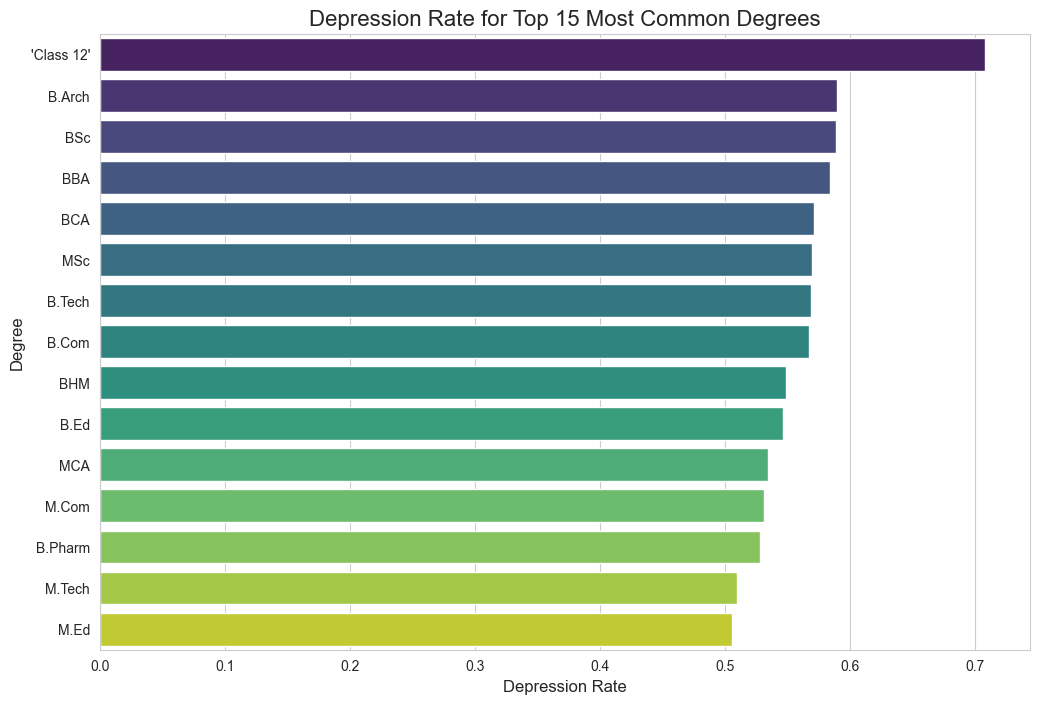

In [196]:
# 1. Find the top 15 most frequent degrees in the dataset
top_15_degrees = df_final_eda['Degree'].value_counts().nlargest(15).index

# 2. Filter our DataFrame to only include students from these top 15 degrees
df_top_degrees = df_final_eda[df_final_eda['Degree'].isin(top_15_degrees)]

# 3. Calculate the depression rate for each degree and sort them
degree_depression_rates = df_top_degrees.groupby('Degree')['Depression'].mean().sort_values(ascending=False)

# 4. Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=degree_depression_rates.values, y=degree_depression_rates.index, palette='viridis')

# Set a clear title and labels
plt.title('Depression Rate for Top 15 Most Common Degrees', fontsize=16)
plt.xlabel('Depression Rate', fontsize=12)
plt.ylabel('Degree', fontsize=12)

# Show the plot

plt.show()

# **Insights:**
* '***Class 12' has the highest depression rate among the top 15 most common degrees***, with a rate significantly higher than the others. This is a notable finding, suggesting that students at this level might be particularly vulnerable.
Several Bachelor's degrees like B.Arch, BSc, BBA, and BCA show relatively high depression rates, clustering together.

* The **depression rates for the top 15 degrees generally range from around 50% to over 70%**, indicating that depression is a significant concern across various academic programs.



---


# **Suicidal Thoughts Analysis**

---



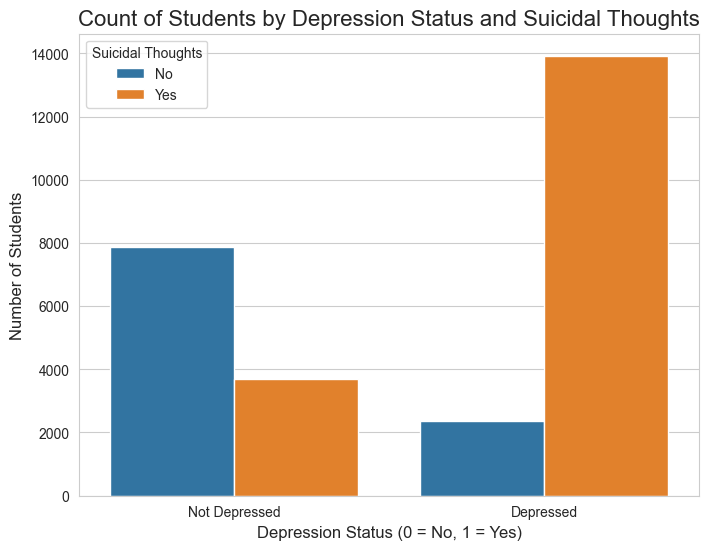

In [197]:
# Visualize the relationship between Depression and Suicidal Thoughts
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', hue='suicidal thoughts ?', data=df_final_eda)

plt.title('Count of Students by Depression Status and Suicidal Thoughts', fontsize=16)
plt.xlabel('Depression Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks([0, 1], ['Not Depressed', 'Depressed']) # Optional: makes the x-axis labels more readable
plt.legend(title='Suicidal Thoughts', labels=['No', 'Yes'])

plt.show()

Distribution of Suicidal Thoughts:


suicidal thoughts ?
1    17625
0    10236
Name: count, dtype: int64


Suicidal Thoughts vs. Depression:


,Not Depressed,Depressed,Total,Depressed %,Not Depressed %
No Suicidal Thoughts,7862,2374,10236,23.192653,76.807347
Yes Suicidal Thoughts,3695,13930,17625,79.035461,20.964539


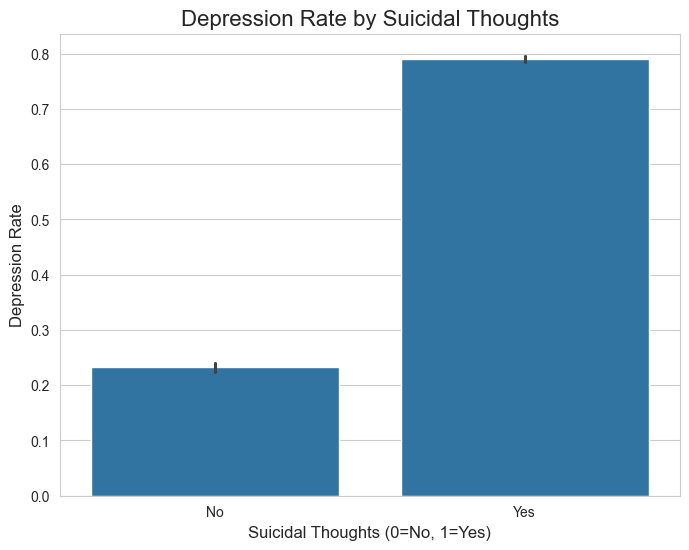

In [198]:
# Analysis Of suicidal thoughts

# 1. Distribution of suicidal thoughts
print("Distribution of Suicidal Thoughts:")
display(df_final_eda['suicidal thoughts ?'].value_counts())

# 2. Relationship with Depression
print("\nSuicidal Thoughts vs. Depression:")
suicidal_depression_crosstab = pd.crosstab(df_final_eda['suicidal thoughts ?'], df_final_eda['Depression'])
suicidal_depression_crosstab.index = ['No Suicidal Thoughts', 'Yes Suicidal Thoughts']
suicidal_depression_crosstab.columns = ['Not Depressed', 'Depressed']

# Calculate percentages
suicidal_depression_crosstab['Total'] = suicidal_depression_crosstab['Not Depressed'] + suicidal_depression_crosstab['Depressed']
suicidal_depression_crosstab['Depressed %'] = (suicidal_depression_crosstab['Depressed'] / suicidal_depression_crosstab['Total']) * 100
suicidal_depression_crosstab['Not Depressed %'] = (suicidal_depression_crosstab['Not Depressed'] / suicidal_depression_crosstab['Total']) * 100


display(suicidal_depression_crosstab)

# 3. Visualize the relationship with Depression
plt.figure(figsize=(8, 6))
sns.barplot(x='suicidal thoughts ?', y='Depression', data=df_final_eda)
plt.title('Depression Rate by Suicidal Thoughts', fontsize=16)
plt.xlabel('Suicidal Thoughts (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Depression Rate', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## **Insights: Suicidal Thoughts and Depression**

Based on the table and plot showing the relationship between suicidal thoughts and depression, here are the key insights:

*   **Strong Correlation:** There is a very strong correlation between reporting suicidal thoughts and being classified as depressed in this dataset.
*   **High Prevalence of Suicidal Thoughts Among Depressed Students:** A large majority of students who are depressed also report having suicidal thoughts. The table shows that **79.03%** of depressed students have suicidal thoughts (**13,934 out of 16,308** depressed students).
*   **Low Prevalence of Suicidal Thoughts Among Non-Depressed Students:** Conversely, among students who are not depressed, a much smaller percentage report suicidal thoughts. Only **23.19%** of non-depressed students have suicidal thoughts (**2,374 out of 11,562** non-depressed students).
*   **Majority of Students with Suicidal Thoughts are Depressed:** The count plot visually reinforces this, showing that the orange bar ('Yes' suicidal thoughts) is much taller for the 'Depressed' group than the 'Not Depressed' group. Similarly, the blue bar ('No' suicidal thoughts) is much taller for the 'Not Depressed' group. The table shows that out of the **17,631** students with suicidal thoughts, **13,934** are depressed.



---


#**Gender VS Depression**

---



* Is there a significant difference in the prevalence of suicidal thoughts between genders?

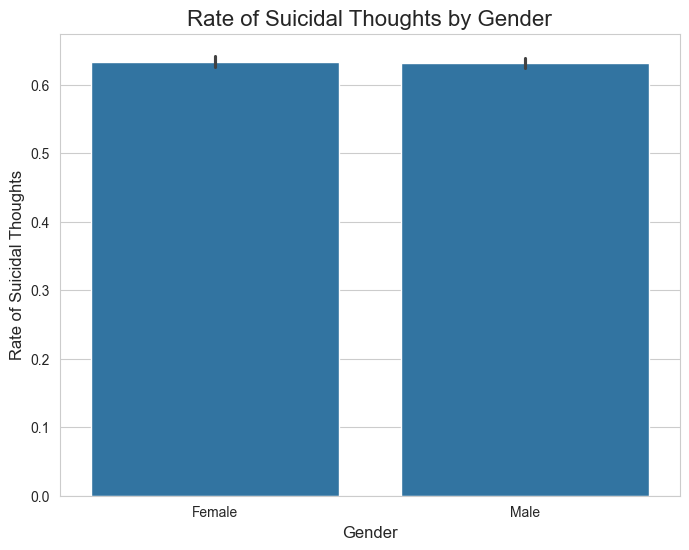

In [199]:
# --- Step 10: EDA - Gender vs. Suicidal Thoughts ---

# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Create the bar plot
# y='suicidal thoughts ?' will calculate the rate, as it's coded 0/1.
sns.barplot(x='Gender', y='suicidal thoughts ?', data=df_final_eda)

# Set a clear title and labels
plt.title('Rate of Suicidal Thoughts by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Rate of Suicidal Thoughts', fontsize=12)

# Set the x-tick labels to 'Female' and 'Male' for clarity (0=Female, 1=Male)
plt.xticks([0, 1], ['Female', 'Male'])

# Show the plot
plt.show()

### **Insights: Gender VS Suicidal Thoughts**

Based on the bar plot showing the Rate of Suicidal Thoughts by Gender, here are the key insights:

*   **Similar Rates of Suicidal Thoughts:** The bar plot indicates that the rate of suicidal thoughts is very similar for both female and male students in this dataset.
*   There does not appear to be a significant difference in the prevalence of suicidal thoughts between genders based on this visualization.

This suggests that gender, on its own, may not be a strong predictor of suicidal thoughts in this student population.



---


# **Identifying Key Factors**

---



* Which factors show the strongest relationship with depression?

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Age,1.000000,-0.076085,0.004516,0.008814,-0.003328,0.057770,-0.113603,-0.032705,-0.095226,-0.004936,-0.226757
Academic Pressure,-0.076085,1.000000,-0.025159,-0.112352,-0.043467,-0.089555,0.261891,0.096032,0.152155,0.030094,0.475077
CGPA,0.004516,-0.025159,1.000000,-0.046969,-0.005361,-0.001928,0.008406,0.002084,0.006263,-0.004088,0.021897
Study Satisfaction,0.008814,-0.112352,-0.046969,1.000000,0.012624,0.020275,-0.083766,-0.036872,-0.065043,-0.003878,-0.168466
Sleep Duration,-0.003328,-0.043467,-0.005361,0.012624,1.000000,-0.001822,-0.054504,-0.028042,-0.004955,-0.012231,-0.087267
Dietary Habits,0.057770,-0.089555,-0.001928,0.020275,-0.001822,1.000000,-0.113018,-0.030232,-0.087415,-0.004729,-0.207002
suicidal thoughts ?,-0.113603,0.261891,0.008406,-0.083766,-0.054504,-0.113018,1.000000,0.121629,0.209369,0.026105,0.546421
Work/Study Hours,-0.032705,0.096032,0.002084,-0.036872,-0.028042,-0.030232,0.121629,1.000000,0.075481,0.017450,0.208738
Financial Stress,-0.095226,0.152155,0.006263,-0.065043,-0.004955,-0.087415,0.209369,0.075481,1.000000,0.008550,0.363691
Family History of Mental Illness,-0.004936,0.030094,-0.004088,-0.003878,-0.012231,-0.004729,0.026105,0.017450,0.008550,1.000000,0.053421


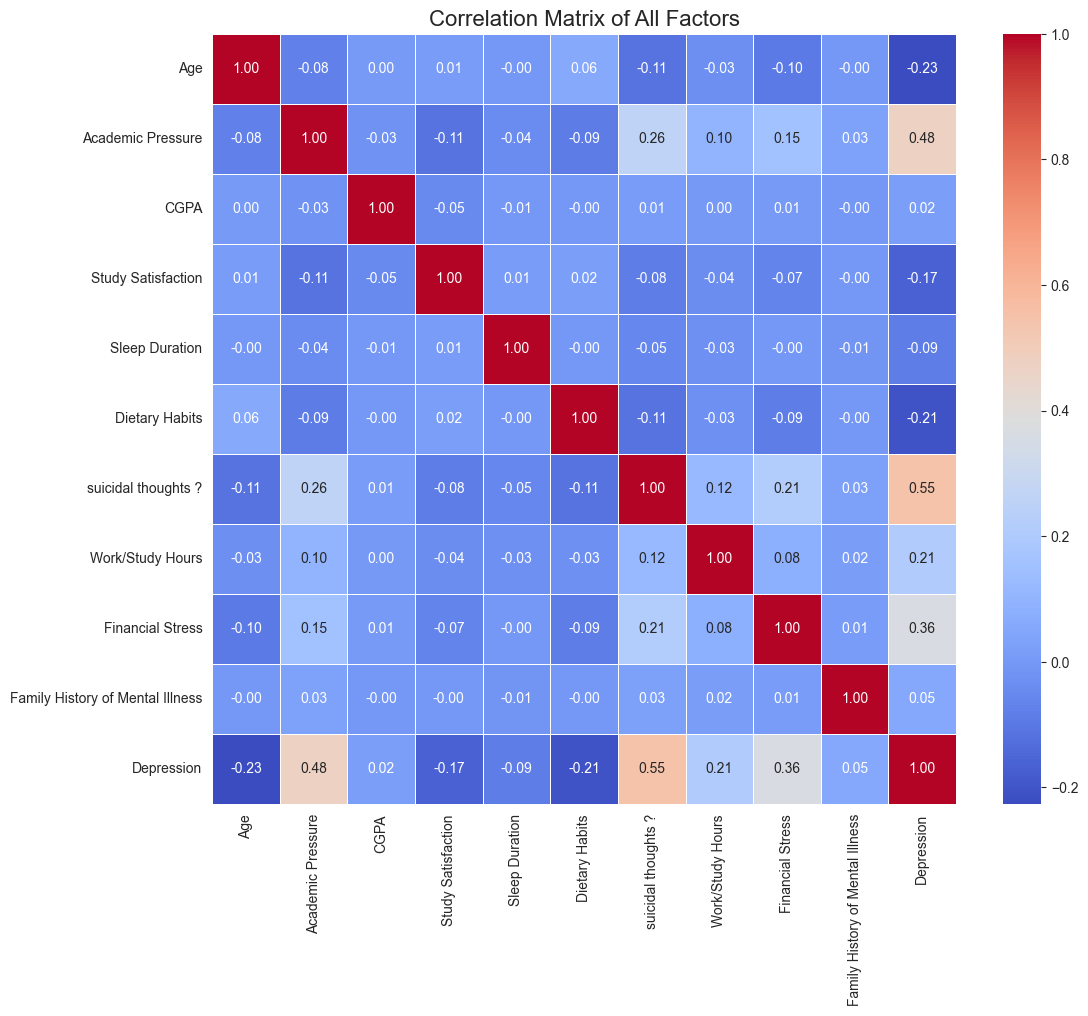

In [200]:
# Correlation Heatmap ---

# To calculate correlation, we first need to select only the numerical columns.
# We will drop the remaining text columns ('city', 'degree') for this step.
# Select only numeric columns
df_numerical = df_final_eda.select_dtypes(include=['number'])

# drop unnecessary columns
df_numerical = df_numerical.drop(columns=['Gender'])

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

display(correlation_matrix)

# Create a figure for the heatmap
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set a clear title
plt.title('Correlation Matrix of All Factors', fontsize=16)

# Show the plot
plt.show()

## **Insights from the Correlation Matrix**

The `correlation_matrix` reveals the linear relationships between the numerical variables in the dataset and provides valuable insights into factors associated with depression:

*   **Strongest Positive Correlations with Depression:**
    *   **Suicidal Thoughts (0.55):** This is the strongest positive correlation with depression, indicating a very close relationship.
    *   **Academic Pressure (0.47):** Higher academic pressure is moderately associated with a higher likelihood of depression.
    *   **Financial Stress (0.36):** Financial worries show a moderate association with increased depression rates.

*   **Other Notable Correlations with Depression:**
    *   **Work/Study Hours (0.21):** A weak positive correlation, suggesting slightly higher depression with more time spent on academic/work tasks.
    *   **Age (-0.23):** A weak negative correlation, implying slightly lower depression rates in older students within this dataset.
    *   **Dietary Habits (-0.21):** A weak negative correlation, supporting the idea that healthier diets are linked to lower depression.
    *   **Study Satisfaction (-0.17):** A weak negative correlation, indicating lower satisfaction with studies is slightly associated with higher depression.

*   **Very Weak or Negligible Correlations with Depression:**
    *   **CGPA (0.02):** Shows almost no linear correlation with depression, reinforcing our earlier observation that the relationship is not a simple linear one.
    *   **Sleep Duration (-0.09):** A very weak negative correlation.
    *   **Family History of Mental Illness (0.05):** Shows a very weak positive linear correlation, although our earlier analysis showed a difference in depression *rates* between groups.

**In summary, the correlation matrix highlights that Suicidal Thoughts, Academic Pressure, and Financial Stress have the most notable linear associations with Depression in this dataset.**



---


# **Combinations of Lifestyle Factors vs. Depression**

---



Depression Rate by Combinations of Sleep Duration and Dietary Habits:


,Sleep Duration,Dietary Habits,Depression
0,0.0,0.0,0.760522
1,0.0,1.0,0.631579
2,0.0,2.0,0.501595
3,1.0,0.0,0.679927
4,1.0,1.0,0.547009
5,1.0,2.0,0.459338
6,2.0,0.0,0.718495
7,2.0,1.0,0.557325
8,2.0,2.0,0.467099
9,3.0,0.0,0.646559


Dietary Habits,0.0,1.0,2.0
Sleep Duration,,,
0.0,0.760522,0.631579,0.501595
1.0,0.679927,0.547009,0.459338
2.0,0.718495,0.557325,0.467099
3.0,0.646559,0.474545,0.366385


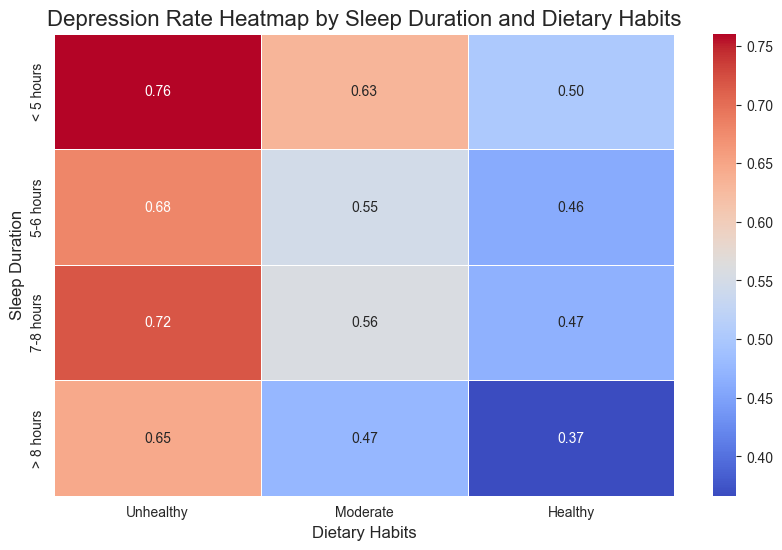

In [201]:
# Group by 'Sleep Duration' and 'Dietary Habits' and calculate the mean of 'Depression'
lifestyle_depression = df_final_eda.groupby(['Sleep Duration', 'Dietary Habits'])['Depression'].mean().reset_index()

# Pivot the table for easier visualization (optional but helpful for heatmaps/grouped bars)
# This will create a table where rows are Sleep Duration, columns are Dietary Habits, and values are Depression Rate
lifestyle_depression_pivot = lifestyle_depression.pivot(index='Sleep Duration', columns='Dietary Habits', values='Depression')

# Print the table
print("Depression Rate by Combinations of Sleep Duration and Dietary Habits:")
display(lifestyle_depression)
display(lifestyle_depression_pivot)


# Visualize the relationship using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(lifestyle_depression_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            xticklabels=['Unhealthy', 'Moderate', 'Healthy'],
            yticklabels=['< 5 hours', '5-6 hours', '7-8 hours', '> 8 hours']) # Use meaningful labels

plt.title('Depression Rate Heatmap by Sleep Duration and Dietary Habits', fontsize=16)
plt.xlabel('Dietary Habits', fontsize=12)
plt.ylabel('Sleep Duration', fontsize=12)

plt.show()

## **Insights: Combinations of Lifestyle Factors vs. Depression**

Based on the heatmap and the table showing the depression rate by combinations of Sleep Duration and Dietary Habits, here are some important insights:

*   **Poor Lifestyle, High Depression:** Students with the combination of **'Less than 5 hours' of Sleep and 'Unhealthy' Dietary Habits** show the highest depression rate (around **76%**). This highlights the amplified risk when both lifestyle factors are poor.
*   **Healthy Lifestyle, Low Depression:** Conversely, students with **'More than 8 hours' of Sleep and 'Healthy' Dietary Habits** have the lowest depression rate (around **37%**). This suggests a protective effect when both lifestyle factors are optimal.
*   **Dietary Habits Show a Stronger Gradient:** Across all sleep durations, moving from 'Unhealthy' to 'Healthy' dietary habits consistently leads to a significant decrease in the depression rate. The impact of diet appears very strong.
*   **Sleep Duration Also Matters:** For a given dietary habit, there is generally a trend where longer sleep durations are associated with lower depression rates, although the gradient might be less steep than that for dietary habits in some cases.
*   **Interaction Observed:** The heatmap visually shows an interaction – the worst outcomes (highest depression) are concentrated in the top-left (poor sleep, unhealthy diet), and the best outcomes (lowest depression) are in the bottom-right (more sleep, healthy diet).

These findings emphasize that both sleep and diet are important for student mental health, and their combined effect can significantly influence the likelihood of depression. Interventions promoting both healthy eating and sufficient sleep could be particularly effective.

* * *
* * *
> #**STATISTICAL ANALYSIS (Hypothesis Tests)**

### **Chi-square test checks whether the observed frequencies in categories differ from the expected frequencies (if there was no relationship).**
* * *
* * *

# **👉 Interpretation:**



> **Chi² Statistic:** This is the test statistic. It measures how far your observed frequencies deviate from the expected frequencies

> *A small value → observed ≈ expected → not much difference.*

> **p-value:** A p-value > 0.05 → we fail to reject the null hypothesis.

> *   If p < 0.05 → Significant → categories are associated.

> *   If p ≥ 0.05 → Not significant → no evidence of relationship.


In [202]:
from scipy.stats import chi2_contingency

##**1.Gender vs Depression (Chi Square Test)**


---



> **Null Hypothesis (H₀):** Gender and Depression are independent (no relationship).

> **Alternative Hypothesis (H₁):** Gender and Depression are not independent (some relationship exists).


In [203]:
contingency_table = pd.crosstab(df_final_eda['Gender'], df_final_eda['Depression'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Observed Frequencies:\n", contingency_table.values)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 0.08627645480502477
p-value: 0.7689653445624786
Degrees of freedom: 1
Observed Frequencies:
 [[5130 7207]
 [6427 9097]]
Expected Frequencies:
 [[5117.50148954 7219.49851046]
 [6439.49851046 9084.50148954]]


**RESULT**

***Chi2 Statistic: ~ 0.0978***

***p-value ~ 0.75(≫ 0.05)***

> **✅ Fail to reject H₀ → No significant evidence that gender is associated with depression.**

> *Translation: there’s no significant evidence of association between Gender and Depression in your dataset.*

**In other words, based on this data, gender does not appear to influence whether someone is depressed.**


##**2. Sleep Duration VS Depression(Chi Square Test)**
---

> **Null Hypothesis (H₀):** 👉 Sleep Duration and Depression are independent.

> **Alternative Hypothesis (H₁):** 👉 Sleep Duration and Depression are not independent..

In [204]:
contingency_table = pd.crosstab(df_final_eda['Sleep Duration'], df_final_eda['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Observed Frequencies:\n", contingency_table.values)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 276.55695905078267
p-value: 1.1771008279168096e-59
Degrees of freedom: 3
Observed Frequencies:
 [[2948 5352]
 [2671 3522]
 [2974 4361]
 [2964 3069]]
Expected Frequencies:
 [[3442.9166218  4857.0833782 ]
 [2568.91357094 3624.08642906]
 [3042.62571336 4292.37428664]
 [2502.54409389 3530.45590611]]


**RESULT**

***Chi2 Statistic: ~ 276.83***

> That’s a huge Chi-square value. It means the differences between your observed counts and what you’d expect under independence are very large. Translation: your observed distribution of depression varies quite a bit depending on sleep duration.

***p-value: 1.03e-59***

> **A p-value this small → reject the null hypothesis.**

> *Interpretation: There is a significant association between Sleep Duration and Depression.*

**how long someone sleeps is not random with respect to whether they’re depressed.**

##**3. Financial Stress & Depression(Chi Square Test)**
---

> **Null Hypothesis (H₀):**  
Financial Stress and Depression are **independent** (no relationship).  

> **Alternative Hypothesis (H₁):**  
Financial Stress and Depression are **not independent** (there is a relationship).  

In [205]:
contingency_table = pd.crosstab(df_final_eda['Financial Stress'], df_final_eda['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Observed Frequencies:\n", contingency_table.values)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 3699.26210638138
p-value: 0.0
Degrees of freedom: 4
Observed Frequencies:
 [[3487 1628]
 [2886 2172]
 [2142 3073]
 [1784 3985]
 [1256 5445]]
Expected Frequencies:
 [[2121.61048891 2993.38951109]
 [2097.96790868 2960.03209132]
 [2163.08869983 3051.91130017]
 [2392.87798837 3376.12201163]
 [2779.45491421 3921.54508579]]


**RESULT**

**Test Results:**  
- Chi² Statistic = **3700.23**  
- p-value = **0.0** (extremely small, effectively < 0.001)  
- Degrees of Freedom = **4**

**Conclusion:**  
>Since the p-value is far below 0.05, we **reject the null hypothesis**.  

>There is a **strong and statistically significant association** between financial stress and depression.

>**Higher financial stress levels appear to be linked with higher depression rates in this dataset.**

### Observed vs Expected Frequencies

| Financial Stress | Observed (Not Depressed) | Observed (Depressed) | Expected (Not Depressed) | Expected (Depressed) | Residuals (Not Depressed) | Residuals (Depressed) |
|------------------|--------------------------|-----------------------|--------------------------|-----------------------|----------------------------|-----------------------|
| 1.0              | 3488                     | 1628                  | 2122.26                  | 2993.74               | +29.6                      | -25.0                 |
| 2.0              | 2886                     | 2172                  | 2098.20                  | 2959.80               | +17.2                      | -14.5                 |
| 3.0              | 2145                     | 3074                  | 2164.99                  | 3054.01               | -0.4                       | +0.4                  |
| 4.0              | 1784                     | 3986                  | 2393.56                  | 3376.44               | -12.5                      | +10.5                 |
| 5.0              | 1257                     | 5447                  | 2781.00                  | 3923.00               | -28.7                      | +24.4                 |


##**4.Work/Study Hours VS Depression**
---

> **Null Hypothesis (H₀):**  
Study Hours Category and Depression are **independent** (no relationship).

> **Alternative Hypothesis (H₁):**  
Study Hours Category and Depression are **not independent** (there is a relationship).  

In [206]:
contingency_table = pd.crosstab(df_final_eda['Study_Hours_Category'], df_final_eda['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Observed Frequencies:\n", contingency_table.values)
print("Expected Frequencies:\n", expected)

Chi2 Statistic: 1112.4921632718954
p-value: 7.093728485109992e-241
Degrees of freedom: 3
Observed Frequencies:
 [[3833 6928]
 [3445 2451]
 [2345 2803]
 [1934 4122]]
Expected Frequencies:
 [[4463.76214063 6297.23785937]
 [2445.71522917 3450.28477083]
 [2135.43792398 3012.56207602]
 [2512.08470622 3543.91529378]]


### **RESULT**
**Test Results:**  
- Chi² Statistic = **1116.29**  
- p-value = **1.06 × 10⁻²⁴¹** (essentially 0)  
- Degrees of Freedom = **3**

**Conclusion:**  

> Since the p-value is far below 0.05, we **reject the null hypothesis**.  
>There is a **very strong and statistically significant association** between study hours and depression.  
>The distribution of depression differs greatly across study hour categories.

---

### Observed vs Expected Frequencies

| Study Hours Category | Observed (Not Depressed) | Observed (Depressed) | Expected (Not Depressed) | Expected (Depressed) | Residuals (Not Depressed) | Residuals (Depressed) |
|----------------------|--------------------------|-----------------------|--------------------------|-----------------------|----------------------------|-----------------------|
| High                 | 3833                     | 6931                  | 4465.50                  | 6298.50               | **-9.4**                   | **+7.9**              |
| Less                 | 3449                     | 2451                  | 2447.64                  | 3452.36               | **+20.2**                  | **-17.0**             |
| Moderate             | 2346                     | 2803                  | 2136.09                  | 3012.91               | +4.6                       | -3.8                  |
| Very High            | 1934                     | 4123                  | 2512.77                  | 3544.23               | **-11.6**                  | **+9.7**              |

---

**How to interpret residuals:**  
- **Residuals > |2|** suggest categories that contribute strongly to the Chi² value.  
- Here we see:  
  - **Less study hours** → more “Not Depressed” than expected, fewer “Depressed”.  
  - **Very High study hours** → fewer “Not Depressed” than expected, more “Depressed”.  
  - **High study hours** also show the opposite imbalance (more depression than expected).  

This pattern suggests that **extreme study habits (too high or too low)** are linked with higher depression rates, while **moderate study** shows a more balanced trend.

* * *
# **Summary of Hypothesis Test Conclusions**
* * *

## **1. Gender vs. Depression (Chi-Square Test)**
> **Result:** With a p-value of ~0.75, we fail to reject the null hypothesis.
> **Conclusion:** There is no statistically significant evidence that gender is associated with depression in this dataset.

* * *

## **2. Sleep Duration vs. Depression (Chi-Square Test)**
> **Result:** With a p-value << 0.05 (1.03e-59), we reject the null hypothesis.
> **Conclusion:** There is a statistically significant association between Sleep Duration and Depression.

* * *

## **3. Financial Stress vs. Depression (Chi-Square Test)**
> **Result:** With a p-value of 0.0, we reject the null hypothesis.
> **Conclusion:** There is a strong and statistically significant association between Financial Stress and Depression.

* * *

## **4. Work/Study Hours vs. Depression (Chi-Square Test)**
> **Result:** With a p-value << 0.05 (1.06e-241), we reject the null hypothesis.
> **Conclusion:** There is a very strong and statistically significant association between Work/Study Hours and Depression.

* * *

* * *

# **Comprehensive Summary of Findings**

Based on the exploratory data analysis of the student depression dataset, the following key insights and observations were made:

---

## **Initial Data Overview & Cleaning:**

*   The dataset is remarkably clean with **no missing values**, which simplified the preprocessing steps.
*   The dataset primarily focuses on **students**, as confirmed by the near-zero values for 'Work Pressure' and 'Job Satisfaction'. These columns were appropriately dropped.
*   Binary categorical columns ('Gender', 'suicidal thoughts ?', 'Family History of Mental Illness') were successfully converted to numerical (0s and 1s).
*   Ordinal categorical columns ('Sleep Duration', 'Dietary Habits') were mapped to numerical ranks and the few 'Others' values were handled by imputing the median.
*   The target variable, 'Depression', shows a roughly **59/41 split** (Depressed/Not Depressed), indicating a moderately balanced dataset for modeling.

---

## **Key Relationships with Depression:**

> **Understanding the factors influencing student depression is crucial. Our analysis revealed several significant relationships:**

*   **CGPA vs. Depression:** The analysis revealed a complex relationship, not a simple linear one. While initial thoughts might suggest lower CGPA correlates with depression, the data shows that students at **both the lower and higher ends of the CGPA spectrum** report higher rates of depression compared to those in the middle academic range. CGPA itself showed a very weak linear correlation with depression (0.02) in the correlation matrix.

> **Academic and Financial Stress are Major Factors:**

*   **Academic Pressure & Study Satisfaction vs. Depression:** These factors show a **strong link to depression**. Depressed students report significantly **higher academic pressure** (average ~3.69) and **lower study satisfaction** (average ~2.75) compared to non-depressed students (pressure ~2.36, satisfaction ~3.21). Academic Pressure had a moderate positive correlation with depression (0.47).

*   **Work/Study Hours vs. Depression:** There is a clear trend that **more hours spent on work/study is associated with higher depression rates**. Students in the 'Very High' study hours category have notably higher depression rates compared to those in the 'Less' or 'Moderate' categories.

*   **Financial Stress vs. Depression:** Financial stress is a **significant factor**. There is a clear trend of **increasing depression rates with increasing financial stress levels**. Financial Stress had a moderate positive correlation with depression (0.36).

*   **Interaction of Financial Stress and Academic Pressure:** Financial stress doesn't just add to academic pressure; it **amplifies its negative effect** on depression. Students with high financial stress experience a much sharper increase in depression as academic pressure rises, compared to those with low financial stress. 😥🔥

> **Lifestyle Choices Play a Role:**

*   **Lifestyle Factors (Sleep & Diet) vs. Depression:**
    *   **Dietary Habits:** Show a **strong association** with depression. Moving from unhealthy to healthy dietary habits is linked to a substantial decrease in depression rates. Dietary Habits had a weak negative correlation with depression (-0.21).

    *   **Sleep Duration:** Also matters, with **longer sleep durations generally associated with lower depression rates**. Sleep Duration had a very weak negative correlation with depression (-0.09).

    *   **Combinations:** The combination of **poor sleep and unhealthy diet** is associated with the **highest depression rates** (~ 76%), while **more sleep and a healthy diet** are linked to the **lowest depression rates** (~37%). 🥗🛌️

> **Other Important Factors:**

*   **Suicidal Thoughts vs. Depression:** There is a **very strong correlation** (0.55) and relationship. A large majority of depressed students (**~79%**) report suicidal thoughts, while a much smaller percentage of non-depressed students (**~23%**) do. This is a critical finding.

*   **Gender vs. Depression:** In this dataset, **gender does not appear to be a significant factor**. The depression rates for male and female students are very similar (~58.6% vs ~58.4%). Gender also showed a negligible correlation with depression in the correlation matrix.

*   **Age vs. Depression:** Age shows a **weak negative correlation** (-0.23), suggesting slightly higher depression in younger students within this sample.

*   **Family History of Mental Illness vs. Depression:** Students with a family history show a slightly higher rate of depression (**~61.2%**) compared to those without (**~56.0%**). This factor had a very weak positive linear correlation (0.05).

*   **Degree vs. Depression:** Depression rates vary across academic degrees. 'Class 12' students showed the highest depression rate among the top 15 most common degrees, highlighting potential vulnerability at this stage.

---

## **Overall Conclusion:**

> **This analysis provides valuable insights into the complex factors associated with student depression.**

The analysis indicates that student depression is a complex issue influenced by multiple factors. While suicidal thoughts are highly correlated with depression, key factors showing notable associations and potential areas for intervention include **Academic Pressure, Financial Stress, Dietary Habits, and Study Satisfaction**. Understanding the interaction between financial and academic stress is also crucial for developing effective support strategies. `Factors like Gender and CGPA do not appear to be strong linear predictors of depression in this datase`t. The findings highlight the importance of addressing both academic environment stressors, financial concerns, and lifestyle factors to support student mental well-being.

* * *
* * *

# -----------------------------------------------------------
>#  Part 2: Re-creating the Analysis with an SQL Pipeline
# -----------------------------------------------------------

### --- Step 1 (SQL Workflow): Load Original Data into Database ---

In [207]:
import pandas as pd
import sqlite3

In [208]:
# Load the ORIGINAL, raw CSV file
df_original = pd.read_csv('../Data/student_depression_raw.csv')

# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

# Save the original DataFrame to a new table named 'students_raw'
df_original.to_sql('students_depression_raw', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print("Successfully loaded the original, raw data into the 'students_raw' table in 'student_data.db'.")

Successfully loaded the original, raw data into the 'students_raw' table in 'student_data.db'.


### --- Step 2 (SQL Workflow): Execute SQL Script In transformations.sql ---

In [210]:
# Open and read your SQL script file
with open('../SQL_Analysis/transformations.sql', 'r') as file:
    sql_script = file.read()

# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

# Execute the SQL script and load the results into a new DataFrame
df_from_sql = pd.read_sql_query(sql_script, conn)

# Close the database connection
conn.close()

# Display the first 5 rows of your new, clean DataFrame
print("Successfully loaded the clean data from the SQL query:")
df_from_sql.head()

Successfully loaded the clean data from the SQL query:


,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,gender_encoded,suicidal_thoughts_encoded,family_history_encoded,sleep_encoded,study_hours_category,diet_encoded,financial_stress_group
0,Male,33,Visakhapatnam,5,8.97,2,'5-6 hours',Healthy,B.Pharm,3,1,1,1,1,0,1.0,Low (0-4 hours),2.0,Low
1,Female,24,Bangalore,2,5.90,5,'5-6 hours',Moderate,BSc,3,2,0,0,0,1,1.0,Low (0-4 hours),1.0,Low
2,Male,31,Srinagar,3,7.03,5,'Less than 5 hours',Healthy,BA,9,1,0,1,0,1,0.0,High (8-10 hours),2.0,Low
3,Female,28,Varanasi,3,5.59,2,'7-8 hours',Moderate,BCA,4,5,1,0,1,1,2.0,Low (0-4 hours),1.0,High
4,Female,25,Jaipur,4,8.13,3,'5-6 hours',Moderate,M.Tech,1,1,0,0,1,0,1.0,Low (0-4 hours),1.0,Low


># Analysis Using SQL

In [211]:
# Check which tables exist in the database
conn = sqlite3.connect('../Data/student_data.db')
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)
conn.close()

                      name
0  students_depression_raw


---
### **Analysis 1: --- Create a Summary Table by Degree ---**

In [212]:
with open('../SQL_Analysis/Analysis_1.sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()

# Display the final summary table
print("SQL Analysis Summary Table by Degree:")
df_sql_summary

SQL Analysis Summary Table by Degree:


,Degree,number_of_students,depression_rate,avg_academic_pressure,avg_cgpa,avg_sleep_score
0,'Class 12',6080,0.707730,3.359375,7.594184,1.423026
1,B.Arch,1477,0.589032,3.062288,7.615579,1.431864
2,BSc,885,0.588701,3.045198,7.578531,1.425339
3,MBBS,695,0.579856,3.153957,7.550345,1.369784
4,BCA,1432,0.571229,3.126397,7.770803,1.321229
5,MSc,1186,0.569140,3.056492,7.513524,1.370464
6,B.Tech,1152,0.568576,3.078993,7.636513,1.400174
7,B.Com,1506,0.566401,3.083001,7.671826,1.297674
8,BHM,922,0.548807,3.131236,7.647213,1.419740
9,B.Ed,1864,0.546137,3.116953,7.852017,1.349436


---
###  **Analysis 2: -- Calculates the depression rate for combined lifestyle factors.**

In [213]:
with open('../SQL_Analysis/Analysis_2..sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()

df_sql_summary

,Sleep Duration,Dietary Habits,number_of_students,depression_rate
0,'5-6 hours',Others,3,1.000000
1,'More than 8 hours',Others,1,1.000000
2,'Less than 5 hours',Unhealthy,3066,0.760274
3,'7-8 hours',Unhealthy,2817,0.718495
4,'5-6 hours',Unhealthy,2179,0.680587
5,'7-8 hours',Others,3,0.666667
6,Others,Healthy,3,0.666667
7,'More than 8 hours',Unhealthy,2239,0.646271
8,'Less than 5 hours',Moderate,3037,0.632203
9,'7-8 hours',Moderate,2511,0.557149


---
###  **Analysis 3: -- Calculates the depression rate for each Gender.**

In [214]:
with open('../SQL_Analysis/Analysis_3.sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()

# Display the final summary table
print("SQL Analysis Summary Table by Gender:")
df_sql_summary

SQL Analysis Summary Table by Gender:


,Gender,StudentsEnrolled,Average_depression
0,Male,15547,58.628674
1,Female,12354,58.450704


> ***The Gender does not have a significant relationship with Depression***

---
###  **Analysis 4: -- Identify the 'high-pressure, low-satisfaction' academic programs**

In [215]:
with open('../SQL_Analysis/Analysis_4.sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()

df_sql_summary

,Degree,number_of_students,avg_academic_pressure,avg_study_satisfaction
0,PhD,521,3.224568,2.940499
1,B.Pharm,809,3.185414,2.944376
2,MBBS,695,3.153957,2.824460
3,BHM,922,3.131236,2.878525
4,BCA,1432,3.126397,2.915503
5,B.Ed,1864,3.116953,2.904506
6,MBA,562,3.113879,2.886121
7,B.Com,1506,3.083001,2.938911
8,LLM,481,3.081081,2.997921
9,B.Tech,1152,3.078993,2.748264


> **These are the programs where academic pressure is high and study satisfaction is low**

---
### **Analysis 5: -------Shows how poor sleep + high academic pressure amplifies depression risk.**

In [216]:
with open('../SQL_Analysis/Analysis_5.sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()

df_sql_summary

,Academic Pressure,Sleep Duration,StudentsEnrolled,Average_depression
0,5,Others,1,1.000000
1,5,'Less than 5 hours',2071,0.896185
2,5,'7-8 hours',1625,0.862769
3,5,'5-6 hours',1309,0.834225
4,5,'More than 8 hours',1290,0.828682
5,4,'Less than 5 hours',1570,0.806369
6,4,'7-8 hours',1295,0.768340
7,4,'5-6 hours',1215,0.744856
8,4,'More than 8 hours',1069,0.706268
9,4,Others,6,0.666667


> ***High academic pressure overwhelms the benefits of good sleep.***

---
### **Analysis 6: Financial Stress × Depression**

In [217]:
with open('../SQL_Analysis/Analysis_6.sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()

df_sql_summary

,Financial Stress,StudentsEnrolled,Average_depression
0,5,6715,0.812807
1,4,5775,0.690909
2,3,5226,0.589361
3,2,5061,0.429757
4,?,3,0.333333
5,1,5121,0.318688


>**High financial stress is a major risk factor for depression**

---
### **Analysis 7: Family History × Suicidal Thoughts × Depression**

In [218]:
with open('../SQL_Analysis/Analysis_7.sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()
df_sql_summary

,family_history,suicidal_thoughts,StudentsEnrolled,Average_depression
0,Yes,Yes,8721,0.810343
1,No,Yes,8935,0.771125
2,Yes,No,4782,0.252196
3,No,No,5463,0.214717


> **This is a critical risk map — students with family history and suicidal thoughts show extremely high depression prevalence.**

---
### **Analysis 8: CGPA × Depression**

In [219]:
with open('../SQL_Analysis/Analysis_8.sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')
    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()
df_sql_summary

,CGPA_group,StudentsEnrolled,Average_depression
0,Good (7-8.9),11946,0.599699
1,High (9-10),6232,0.575578
2,Average (5-6.9),9714,0.574532
3,Low (<5),9,0.444444


>***CGPA Does not seem to be a risk factor for depression.***

---
### **Analysis 9: Geographical Analysis**

In [220]:
with open('../SQL_Analysis/Analysis_9.sql', 'r') as file:
    sql_script = file.read()
    
# Create a connection to your database
conn = sqlite3.connect('../Data/student_data.db')

    
# Execute the query and load the results into a final summary DataFrame
df_sql_summary = pd.read_sql_query(sql_script, conn)

# Close the connection
conn.close()

df_sql_summary

,City,Average_depression,Avg_Financial_Stress,Avg_Study_Hours,StudentsEnrolled
0,Ahmedabad,0.672976,3.253417,7.237645,951
1,Hyderabad,0.669403,3.267164,7.341791,1340
2,Patna,0.631579,3.275074,7.419067,1007
3,Rajkot,0.626225,3.126225,7.213235,816
4,Bhopal,0.619914,3.094218,7.210921,934
5,Bangalore,0.608866,3.173403,7.166884,767
6,Kolkata,0.608818,3.114447,7.191370,1066
7,Delhi,0.608583,3.201560,7.122237,769
8,Indore,0.604977,3.172628,7.195956,643
9,Meerut,0.597576,3.030303,7.050909,825
